In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train.info()

In [ ]:
df_train.describe()

In [ ]:
df_train.head()

In [ ]:
df_test.head()

In [ ]:
df_train.corr()

In [ ]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
lbl = LabelEncoder()
df_train['Embarked'] = lbl.fit_transform(df_train.Embarked)
df_test['Embarked'] = lbl.fit_transform(df_test.Embarked)

df_train['Sex'] = lbl.fit_transform(df_train.Sex)
df_test['Sex'] = lbl.fit_transform(df_test.Sex)

In [ ]:
df_train = df_train.drop(['Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket','Cabin'], axis=1)

In [ ]:
df_train.isna().sum()
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [ ]:
si = SimpleImputer(strategy="mean", missing_values=np.nan)
df_train['Age'] = si.fit_transform(df_train[['Age']])
df_test['Age'] = si.fit_transform(df_test[['Age']])

df_train['Fare'] = si.fit_transform(df_train[['Fare']])
df_test['Fare'] = si.fit_transform(df_test[['Fare']])

In [ ]:
X_train = df_train.drop(["Survived","PassengerId"], axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state=0)

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
model.score(X_train, Y_train)

0.7867564534231201

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
Y_train

In [ ]:
Y_train1 = Y_train.iloc[0:418]
Y_train1

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    1
417    1
Name: Survived, Length: 418, dtype: int64

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_train1, y_pred)
print(cf_matrix)

[[157  98]
 [109  54]]


In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(Y_train1, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       255
           1       0.36      0.33      0.34       163

    accuracy                           0.50       418
   macro avg       0.47      0.47      0.47       418
weighted avg       0.50      0.50      0.50       418



In [ ]:
import seaborn as sns
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2f')
ax.set_xlabel('\nPRedicted values')
ax.set_ylabel('Actual values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport

CRplot = ClassificationReport(model,classes=["Not-Survived","Survived"], support=True)
CRplot.fit(x_train, y_train)
CRplot.score(x_test, y_test)
CRplot.show()

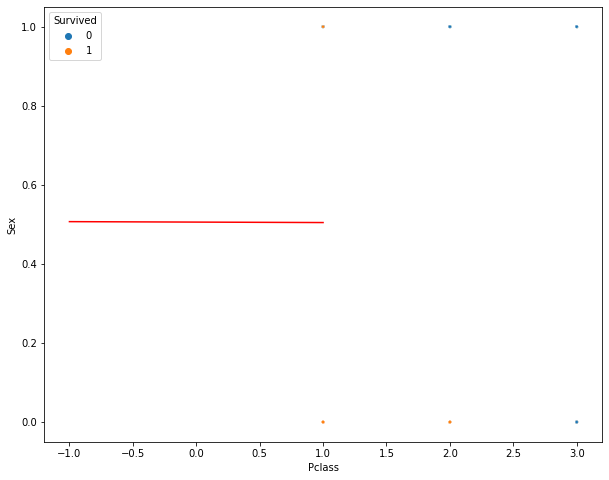

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train.iloc[:, 0], 
                y=X_train.iloc[:, 1], 
                hue=Y_train, 
                s=8);
# Constructing a hyperplane using a formula.
w = model.coef_[0]           # w consists of 2 elements
b = model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

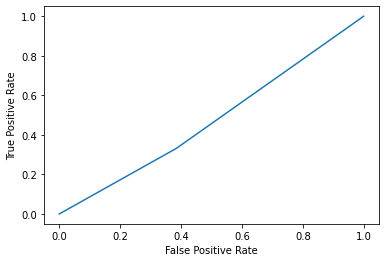

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(Y_train1, y_pred, pos_label=1)
display = RocCurveDisplay(fpr=fpr, tpr=tpr)
area = auc(fpr, tpr)
display.plot()
plt.show()